In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from seastar.seastar.gmfs.doppler import *
from seastar.seastar.oscar.oscar import *
from seastar.seastar.retrieval.retrieval import*


In [2]:
#for_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_33_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_34_pres_1_fdc_auto.sar.nc"
#aft_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_77_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_78_pres_1_fdc_auto.sar.nc"
for_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_Sept_19_2022\SAR_CPLX_20220517T093239_13.5G_VV_33_pres_1_fdc_auto.sar.sig_INF_SAR_CPLX_20220517T093239_13.5G_VV_34_pres_1_fdc_auto.sar.sig.nc"
aft_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_Sept_19_2022\SAR_CPLX_20220517T093239_13.5G_VV_77_pres_1_fdc_auto.sar.sig_INF_SAR_CPLX_20220517T093239_13.5G_VV_78_pres_1_fdc_auto.sar.sig.nc"
mid_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_00_pres_1_fdc_auto.sar.nc"

dsm = xr.open_dataset(mid_file, mask_and_scale=True)
dsf = xr.open_dataset(for_file, mask_and_scale=True)
dsa = xr.open_dataset(aft_file, mask_and_scale=True)

In [3]:
level2=init_level2(dsa, dsf, dsm)

In [4]:
level2=generate_wind_field_from_single_measurement(level2, u10=9, wind_direction=20)
level2['RelativeWindDirectionFore']=compute_relative_wind_direction(level2.AntennaAzimuthImageFore,level2.WindDirectionImage)

level2['CDOPFore'] = xr.DataArray(
        mouche12(level2.u10Image, level2.RelativeWindDirectionFore,np.degrees(level2.IncidenceAngleImageFore), 'VV'),
        coords=[level2.CrossRange, level2.GroundRange],
        dims=('CrossRange', 'GroundRange'))

#level2['CDOPFore'] = mouche12(level2.u10Image, level2.RelativeWindDirectionFore,
#                              np.degrees(level2.IncidenceAngleImageFore), 'VV')
level2['WindLineOfSightVelocityFore'],level2['WindSurfaceVelocityFore'] = convertDoppler2Velocity(
    5.5, level2.CDOPFore, np.degrees(level2.IncidenceAngleImageFore)) 
level2['RadialSurfaceVelocityFore']=level2.RadialSurfaceVelocityFore-level2.WindSurfaceVelocityFore
level2['RelativeWindDirectionAft']=compute_relative_wind_direction(level2.AntennaAzimuthImageAft,level2.WindDirectionImage)
level2['CDOPAft'] = xr.DataArray(
        mouche12(level2.u10Image, level2.RelativeWindDirectionAft,np.degrees(level2.IncidenceAngleImageAft), 'VV'),
        coords=[level2.CrossRange, level2.GroundRange],
        dims=('CrossRange', 'GroundRange'))
level2['WindLineOfSightVelocityAft'],level2['WindSurfaceVelocityAft'] = convertDoppler2Velocity(
    5.5, level2.CDOPAft, np.degrees(level2.IncidenceAngleImageAft)) 
level2['RadialSurfaceVelocityAft']=level2.RadialSurfaceVelocityAft-level2.WindSurfaceVelocityAft


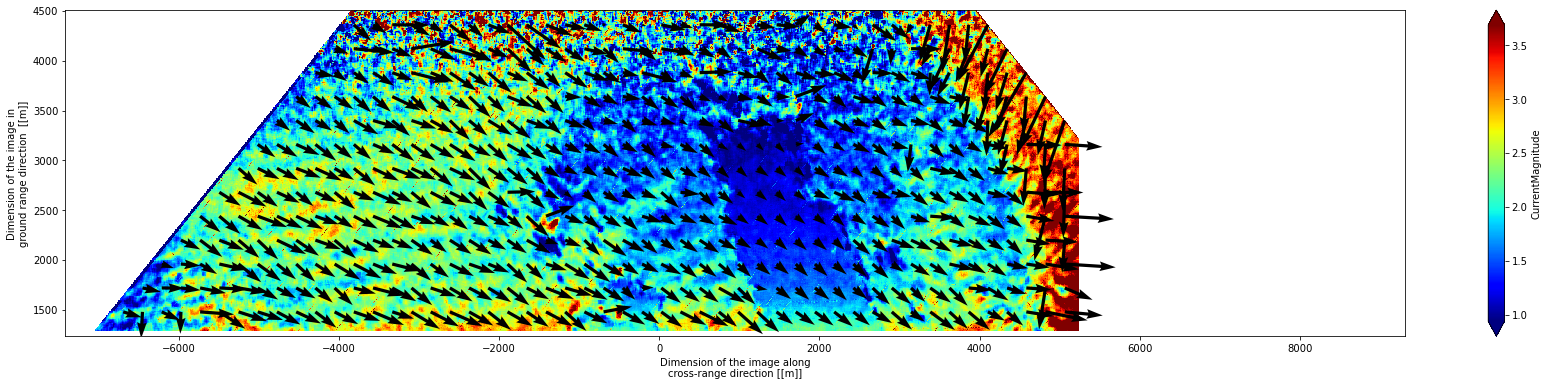

In [5]:
level2=compute_surface_currents(level2)

X,Y=np.meshgrid(level2.GroundRange,level2.CrossRange)

ax3 = level2.CurrentMagnitude.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,
plot_i=30




ax4=plt.quiver(Y[::plot_i, ::plot_i],
               X[::plot_i, ::plot_i],
               level2.CurrentVectorUComponent[::plot_i, ::plot_i],
               level2.CurrentVectorVComponent[::plot_i, ::plot_i])



#ax4.axes.set_aspect('equal')






#ax5.axes.set_aspect('equal')



